# **Project**
- **Source**: **RateYourMusic.com reviews**
- **What we collected:** **Album name, Artist name, User review text, User rating**
- **Why it matters**:
    - Reviews are **crowdsourced opinions**, rich with descriptions (romantic, moody, noisy, etc.) and **ratings** (quality signal).
    - This is our **raw fuel**.
- This gives us a **crowdsourced dataset** → thousands of reviews written by real people.
- Each review is a ***data** **point*** that carries **opinions**, **descriptions**, and **emotions** **about** **an** **album**.

## **WebScraper**

### **Latest Page Scraper**

- We started off scraping the album reviews from [rateyourmusic.com/latest](http://rateyourmusic.com/latest).
- The web scraper scrolled through the most recent user reviews for any given album and the pulled all the albums name, artist name, user review and user rating.
- This gave us ~2,000 reviews fairly quickly. However, this section of the website limits us to only 2,000 reviews, so we had to go deeper into the website to get the full 8,000.


### **Charts Scraper**
- In search of more album reviews, we switched to seeding albums from (Top albums of all time, 2024 and 2025 top albums)
- For each album found in those charts, the scraper went into its reviews page and collected reviews for each album, allowing us to get a larger variety of genres and artists and pull the require data amount.


#### Importing dataset

In [ ]:
import pandas as pd
import numpy as np

import numpy as np, gensim, pandas as pd
from gensim.models import Word2Vec

import re, multiprocessing, numpy as np, pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy.linalg import norm

#  Load the dataset
df = pd.read_csv('rym_reviews_FINAL_ASSIGN_fixed.csv')

#### Discarding null user_rating rows

In [ ]:
#checking for any null values on user_rating
df['user_rating'].isna().sum()

df.head()

np.int64(199)

In [7]:
#we need a user_rating for every review for later down the line, so dropping rows where users skipped this
df = df.dropna(subset=['user_rating'])

df.info()

#sanity check
df['user_rating'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 8115 entries, 0 to 8313
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   album_name    8115 non-null   object 
 1   artist        8115 non-null   object 
 2   album_review  8114 non-null   object 
 3   user_rating   8115 non-null   float64
dtypes: float64(1), object(3)
memory usage: 317.0+ KB


np.int64(0)

#### Discarding null album_review rows

In [8]:
df['album_review'].isna().sum()

df = df.dropna(subset=['album_review'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8114 entries, 0 to 8313
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   album_name    8114 non-null   object 
 1   artist        8114 non-null   object 
 2   album_review  8114 non-null   object 
 3   user_rating   8114 non-null   float64
dtypes: float64(1), object(3)
memory usage: 317.0+ KB


## Cleaning strings

In [9]:
df['album_review'] = df['album_review'].str.lower().str.replace('[^\w\s]','', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
/var/folders/qk/vdr0dvt91yj5p8tdhjkrzflh0000gn/T/ipykernel_64660/2785993919.py:1: SyntaxWarning: invalid escape sequence '\w'
  df['album_review'] = df['album_review'].str.lower().str.replace('[^\w\s]','', regex=True)


In [14]:
df_en = pd.read_csv('rym_reviews_FINAL_ASSIGN_fixed.csv')
df_en

,album_name,artist,album_review,user_rating
0,L'impôt du sang,Conifère,"clever, ambitious, and absolutely pulling it o...",4.5
1,L'impôt du sang,Conifère,An earworm-y set of melodic metal tracks that ...,4.0
2,L'impôt du sang,Conifère,With a really nice production and mixing for a...,3.5
3,Low,David Bowie,"My first (conscious) acquaintance with ""Low"" w...",5.0
4,Low,David Bowie,Now this is an album that makes more sense on ...,5.0
...,...,...,...,...
8309,Bocanada,Gustavo Cerati,El inicio de mi obsesión con la música Qué se ...,5.0
8310,Good vs Evil,Forgiato Blow,"We're not planting seeds of division here, we'...",0.5
8311,The Passionate Ones,Nourished by Time,marcus brown toes the line between nostalgia a...,4.5
8312,C'est Nos Vis,Chaufau,Des suisses bien inspirés On ressent plein d’i...,3.5


In [15]:
df3 = (df[['album_name','album_review','user_rating']]
       .rename(columns={'album_name':'product_name',
                        'album_review':'product_review',
                        'user_rating':'user_rating'}))

df3.to_csv('reviews_3cols.csv', index=False)
df3.head(3)

,product_name,product_review,user_rating
0,L'impôt du sang,clever ambitious and absolutely pulling it off,4.5
1,L'impôt du sang,an earwormy set of melodic metal tracks that i...,4.0
2,L'impôt du sang,with a really nice production and mixing for a...,3.5


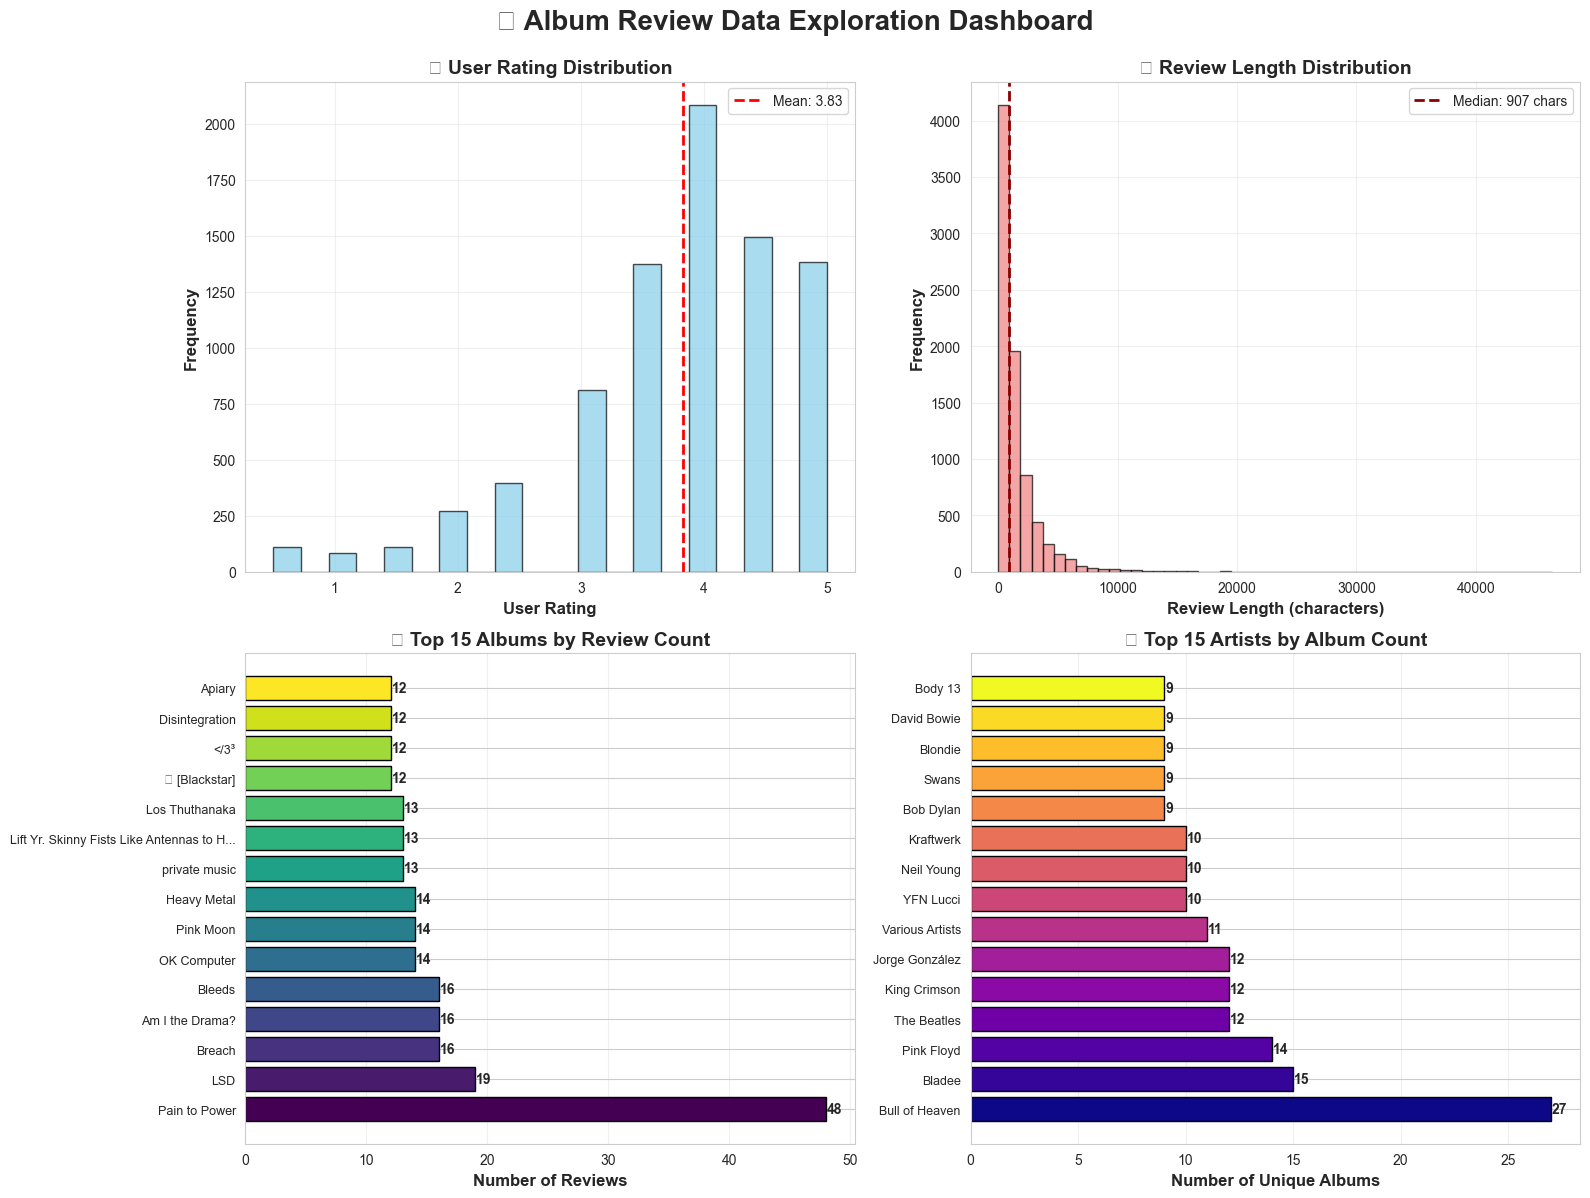

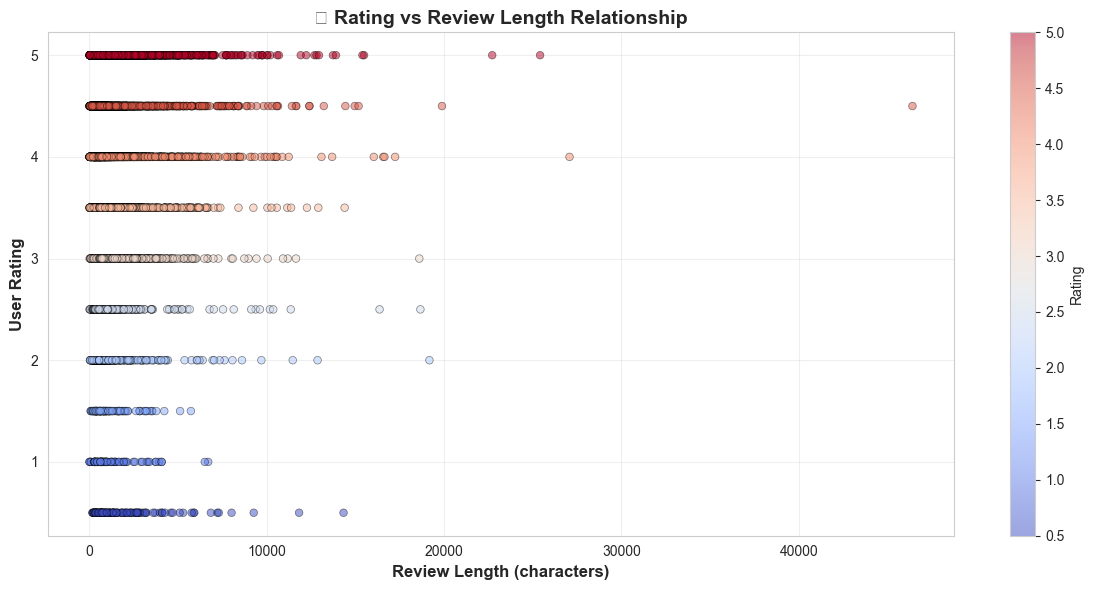

✅ Data exploration visualizations complete!


In [16]:
# ============================================
# DATA EXPLORATION VISUALIZATIONS
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
sns.set_palette("husl")

# 1. User Rating Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Album Review Data Exploration Dashboard', fontsize=20, fontweight='bold', y=0.995)

# Rating distribution histogram
ax1 = axes[0, 0]
if 'user_rating' in df.columns and df['user_rating'].notna().sum() > 0:
    ratings = pd.to_numeric(df['user_rating'], errors='coerce').dropna()
    ax1.hist(ratings, bins=20, edgecolor='black', alpha=0.7, color='skyblue')
    ax1.axvline(ratings.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {ratings.mean():.2f}')
    ax1.set_xlabel('User Rating', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax1.set_title('🎯 User Rating Distribution', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

# Review length distribution
ax2 = axes[0, 1]
if 'album_review' in df.columns:
    review_lengths = df['album_review'].astype(str).str.len()
    ax2.hist(review_lengths, bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
    ax2.axvline(review_lengths.median(), color='darkred', linestyle='--', linewidth=2, 
                label=f'Median: {review_lengths.median():.0f} chars')
    ax2.set_xlabel('Review Length (characters)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax2.set_title('📝 Review Length Distribution', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

# Top albums by review count
ax3 = axes[1, 0]
if 'album_name' in df.columns:
    album_counts = df['album_name'].value_counts().head(15)
    colors = plt.cm.viridis(np.linspace(0, 1, len(album_counts)))
    bars = ax3.barh(range(len(album_counts)), album_counts.values, color=colors, edgecolor='black')
    ax3.set_yticks(range(len(album_counts)))
    ax3.set_yticklabels([name[:40] + '...' if len(name) > 40 else name for name in album_counts.index], fontsize=9)
    ax3.set_xlabel('Number of Reviews', fontsize=12, fontweight='bold')
    ax3.set_title('🏆 Top 15 Albums by Review Count', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3, axis='x')
    # Add value labels
    for i, v in enumerate(album_counts.values):
        ax3.text(v + 0.1, i, str(v), va='center', fontweight='bold')

# Albums per artist distribution
ax4 = axes[1, 1]
if 'artist' in df.columns:
    artist_albums = df.groupby('artist')['album_name'].nunique().sort_values(ascending=False).head(15)
    colors = plt.cm.plasma(np.linspace(0, 1, len(artist_albums)))
    bars = ax4.barh(range(len(artist_albums)), artist_albums.values, color=colors, edgecolor='black')
    ax4.set_yticks(range(len(artist_albums)))
    ax4.set_yticklabels([name[:35] + '...' if len(name) > 35 else name for name in artist_albums.index], fontsize=9)
    ax4.set_xlabel('Number of Unique Albums', fontsize=12, fontweight='bold')
    ax4.set_title('🎨 Top 15 Artists by Album Count', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='x')
    # Add value labels
    for i, v in enumerate(artist_albums.values):
        ax4.text(v + 0.05, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Rating vs Review Length Scatter
fig, ax = plt.subplots(figsize=(12, 6))
if 'user_rating' in df.columns and 'album_review' in df.columns:
    ratings = pd.to_numeric(df['user_rating'], errors='coerce')
    review_lens = df['album_review'].astype(str).str.len()
    valid = ratings.notna() & review_lens.notna()
    
    scatter = ax.scatter(review_lens[valid], ratings[valid], alpha=0.5, s=30, 
                        c=ratings[valid], cmap='coolwarm', edgecolors='black', linewidth=0.5)
    ax.set_xlabel('Review Length (characters)', fontsize=12, fontweight='bold')
    ax.set_ylabel('User Rating', fontsize=12, fontweight='bold')
    ax.set_title('💭 Rating vs Review Length Relationship', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, ax=ax, label='Rating')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("✅ Data exploration visualizations complete!")


In [17]:
# unique count on full dataset
n_unique_full = df['album_name'].nunique()
print('Unique albums (full):', n_unique_full)

# choose ~250 albums with most reviews (fix seed only if tie-breaking via random)
counts = df.groupby('album_name').size().rename('n_reviews').reset_index()
top_albums = counts.sort_values('n_reviews', ascending=False).head(250)['album_name']
df_250 = df[df['album_name'].isin(top_albums)].copy()

# verify counts and basic sanity
print('Unique albums (subset):', df_250['album_name'].nunique())
print('Total reviews (subset):', len(df_250))
print(df_250.groupby('album_name').size().describe())


Unique albums (full): 2453
Unique albums (subset): 250
Total reviews (subset): 2326
count    250.000000
mean       9.304000
std        2.982476
min        8.000000
25%        8.000000
50%        8.000000
75%       10.000000
max       48.000000
dtype: float64


## General Frequency Attributes

In [70]:
import re
import pandas as pd
from collections import Counter
from sklearn.feature_extraction import text as sktext

# Base data
df_attr = df.copy()
df_attr = df_attr.dropna(subset=['album_review'])
df_attr['album_review'] = df_attr['album_review'].astype(str)

# Base English stopwords from scikit-learn
base_en = set(sktext.ENGLISH_STOP_WORDS)

# Domain + reviewer generic stops
domain_stops = {
    'album','albums','artist','artists','track','tracks','song','songs','record','records',
    'lp','ep','side','production','mix','mixing','band','release','released','version',
    'deluxe','remaster','remastered','music','musical','disc','cd','vinyl'
}
reviewer_fillers = {
    'like','really','good','bad','great','nice','cool','awesome','love','hate','think',
    'about','way','well','first','time','still','again','ever','always','pretty','quite',
    'rather','literally','definitely','maybe','probably','honestly','basically','actually',
    'just','also','though','however','anyway'
}
aux_modals = {'do','does','did','have','has','had','can','could','may','might','will','would','shall','should','im','amp'}
non_en_func = {'que','de','la','le','les','el','los','las','y','en','un','una','es','por','para','con','mais','plus','menos','si'}

# also need to deal with contractions
_contr = [
    (r"n['’']t\b", " not"),
    (r"['’']re\b", " are"),
    (r"['’']s\b", " is"),
    (r"['’']m\b", " am"),
    (r"['’']ll\b", " will"),
    (r"['’']d\b", " would"),
    (r"['’']ve\b", " have"),
    (r"\bcant\b", "can not"), (r"\bwon['’]?t\b", "will not"),
]

stop_set = base_en | domain_stops | reviewer_fillers | aux_modals | non_en_func | {'dont', 'cant', 'wont', 'theres'}

def normalize_text(text: str) -> str:
    t = text.lower()
    for pat, rep in _contr:
        t = re.sub(pat, rep, t)
    t = re.sub(r"[^a-z\s]", " ", t)  # keep letters/spaces
    t = re.sub(r"\s+", " ", t).strip()
    return t

def tokenize_unigrams(text: str):
    t = normalize_text(text)
    toks = t.split()
    return [w for w in toks if len(w) >= 3 and w.isalpha() and w not in stop_set]

# Count unique unigrams per review
counter = Counter()
for txt in df_attr['album_review']:
    counter.update(set(tokenize_unigrams(txt)))

df_attr = df_attr.dropna(subset=['album_review'])
df_attr['album_review'] = df_attr['album_review'].astype(str)

# Small post-prune of remaining discourse-y terms if present
post_prune = {'thing','stuff','people','music'}  # conservative
for p in post_prune:
    counter.pop(p, None)

top200 = counter.most_common(10)
top200_df = pd.DataFrame(top200, columns=['attribute','count'])
print("Top 200 unigram attributes (cleaned):")
print(top200_df.to_string(index=False))

Top 200 unigram attributes (cleaned):
attribute  count
    sound   2157
     best   1822
 reviewed   1667
     feel   1657
   listen   1617
   sounds   1482
   vocals   1427
      lot   1326
      say   1232
     make   1232


## New features?

I originally landed on the attributes **rock, metal, and guitar** which seemed generic. To make our attributes more orthogonal (independent, whereas rock and metal are basically the same thing and redundant, creating really small angles with great similarity), we can break up album features into more broad categories. Choosing rock and metal constrict us to a specific cluster and cut up within that cluster.

-  Structure/presence: **vocals** with 1391 mentions
-  Instrumentation: **guitar** with 987 mentions
-  Texture/mood: **atmosphere** with 515 mentions

Instrumentation, texture/mood, and structure broadly categorize albums of all types.

It depends totally on how we structure our end-user's query. We could give our end-user a choice out of even more broad categories, or we can have the end-user make up their own exact genres and favorites to consider.

## Attribute lexicons

In [19]:
# === Facet mapping for album reviews ===
import re
import pandas as pd
from sklearn.feature_extraction import text as sktext

# Reuse/align with your existing pipeline
base_en = set(sktext.ENGLISH_STOP_WORDS)
domain_stops = {
    'album','albums','artist','artists','track','tracks','song','songs','record','records',
    'lp','ep','side','production','mix','mixing','band','release','released','version',
    'deluxe','remaster','remastered','music','musical','disc','cd','vinyl'
}
reviewer_fillers = {
    'like','really','good','bad','great','nice','cool','awesome','love','hate','think',
    'about','way','well','first','time','still','again','ever','always','pretty','quite',
    'rather','literally','definitely','maybe','probably','honestly','basically','actually',
    'just','also','though','however','anyway'
}
aux_modals = {'do','does','did','have','has','had','can','could','may','might','will','would','shall','should','im','amp'}
non_en_func = {'que','de','la','le','les','el','los','las','y','en','un','una','es','por','para','con','mais','plus','menos','si'}

_contr = [
    (r"n['’']t\b", " not"),
    (r"['’']re\b", " are"),
    (r"['’']s\b", " is"),
    (r"['’']m\b", " am"),
    (r"['’']ll\b", " will"),
    (r"['’']d\b", " would"),
    (r"['’']ve\b", " have"),
    (r"\bcant\b", "can not"), (r"\bwon['’]?t\b", "will not"),
]
stop_set = base_en | domain_stops | reviewer_fillers | aux_modals | non_en_func | {'dont','cant','wont','theres'}

def normalize_text(text: str) -> str:
    t = text.lower()
    for pat, rep in _contr:
        t = re.sub(pat, rep, t)
    t = re.sub(r"[^a-z\s]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

# Facet lexicon (expand as needed; seeded from your top-200 list)
facet_lex = {
    'Instrumentation': {
        'guitar','guitars','bass','drums','beats','piano','riffs','solo','sax','saxophone','synth','synths'
    },
    'Vocals': {
        'vocals','vocal','voice','singing','falsetto','growls','harsh','choir','choral','screams','spoken','rap'
    },
    'Mood': {
        'atmosphere','dark','emotional','beautiful','heavy','energetic','melancholic','dreamy','aggressive','uplifting','cinematic'
    },
    'Production': {
        'live','lofi','lo-fi','raw','polished','warm','analog','digital','reverb','reverbed','compressed','dynamic','mix','mixing'
    },
    'Structure': {
        'instrumental','melodic','interlude','suite','long','short','verses','chorus','throughcomposed','through-composed'
    },
    'Genre': {
        'rock','metal','pop','jazz','soul'
    },
    'Writing': {
        'lyrics','lyrical','lyricism','songwriting','themes','story','storytelling'
    }
}

# === Add hierarchical subfacets without changing macros ===
hier_lex = {
    'Instrumentation': {
        'Guitars': {'guitar','guitars','riffs','solo','fingerstyle','shredding','palm','chugs'},
        'Rhythm': {'drums','beats','drum','drummer','percussion','polyrhythmic'},
        'Keys': {'piano','organ','keyboard','keys'},
        'Synths': {'synth','synths','analog','digital','modular'},
        'LowEnd': {'bass','sub','lowend','low-end'}
    },
    'Vocals': {
        'Presence': {'instrumental','vocal','vocals','voice','singing'},
        'Style': {'falsetto','growls','harsh','screams','spoken','rap','choir','choral','duet'}
    },
    'Mood': {
        'Valence': {'beautiful','melancholic','dreamy','uplifting','ominous','bittersweet'},
        'Arousal': {'energetic','aggressive','tranquil','intense','heavy'},
        'Space': {'atmosphere','atmospheric','dark','cinematic','spacious','lush','dry'}
    },
    'Production': {
        'Fidelity': {'lofi','lo-fi','raw','polished','crisp','warm'},
        'Dynamics': {'compressed','dynamic','loudness'},
        'Environment': {'live','studio','room','reverb','reverbed','dry'}
    },
    'Structure': {
        'Form': {'verse','chorus','throughcomposed','through-composed','suite','interlude'},
        'LengthDensity': {'long','short','minimalist','maximalist','layered','dense','jam'}
    },
    'Genre': {
        'RockMetal': {'rock','metal','black'},
        'PopSoul': {'pop','soul'},
        'Jazz': {'jazz'},
        'HipHop': {'rap'}
    },
    'Writing': {
        'Content': {'lyrics','lyrical','lyricism','songwriting','themes','story','storytelling'}
    }
}

# Build token->subfacet
term2sub = {t: sub for macro, subdict in hier_lex.items() for sub, terms in subdict.items() for t in terms}

def map_reviews_to_facets_hier(df_attr):
    facet_tags = []
    facet_text = []
    sub_tags = []
    sub_text = []
    for txt in df_attr['album_review'].astype(str):
        t = normalize_text(txt)
        toks = [w for w in t.split() if len(w) >= 3 and w.isalpha() and w not in stop_set]
        # Macros (existing)
        macros = sorted(set(term2facet[w] for w in toks if w in term2facet))
        # Subfacets (new)
        subs = sorted(set(term2sub[w] for w in toks if w in term2sub))
        facet_tags.append(macros)
        facet_text.append(' '.join(macros))
        sub_tags.append(subs)
        sub_text.append(' '.join(subs))
    out = df_attr.copy()
    out['facet_tags'] = facet_tags
    out['facet_text'] = facet_text
    out['facet_subs'] = sub_tags
    out['facet_subtext'] = sub_text
    return out

# Example usage (keeps your original function available too):
# df_attr_mapped = map_reviews_to_facets_hier(df_attr)
# df_attr_mapped[['album_review','facet_text','facet_subtext']].head()

# Build lookup
term2facet = {t: facet for facet, terms in facet_lex.items() for t in terms}

def tokens_to_facets(tokens, dedupe=True):
    mapped = [term2facet[tok] for tok in tokens if tok in term2facet]
    if dedupe:
        mapped = sorted(set(mapped))
    return mapped

def map_reviews_to_facets(df_attr):
    tags_col = []
    text_col = []
    for txt in df_attr['album_review'].astype(str):
        t = normalize_text(txt)
        toks = [w for w in t.split() if len(w) >= 3 and w.isalpha() and w not in stop_set]
        tags = tokens_to_facets(toks, dedupe=True)
        tags_col.append(tags)
        text_col.append(' '.join(tags))
    out = df_attr.copy()
    out['facet_tags'] = tags_col
    out['facet_text'] = text_col
    return out

# Example usage:
df_attr_mapped = map_reviews_to_facets(df_attr)
df_attr_mapped[['album_review','facet_tags','facet_text']].head()


,album_review,facet_tags,facet_text
0,clever ambitious and absolutely pulling it off,[],
1,an earwormy set of melodic metal tracks that i...,"[Genre, Structure]",Genre Structure
2,with a really nice production and mixing for a...,"[Genre, Structure]",Genre Structure
3,my first conscious acquaintance with low was w...,"[Genre, Mood, Production, Structure]",Genre Mood Production Structure
4,now this is an album that makes more sense on ...,"[Genre, Mood, Structure]",Genre Mood Structure


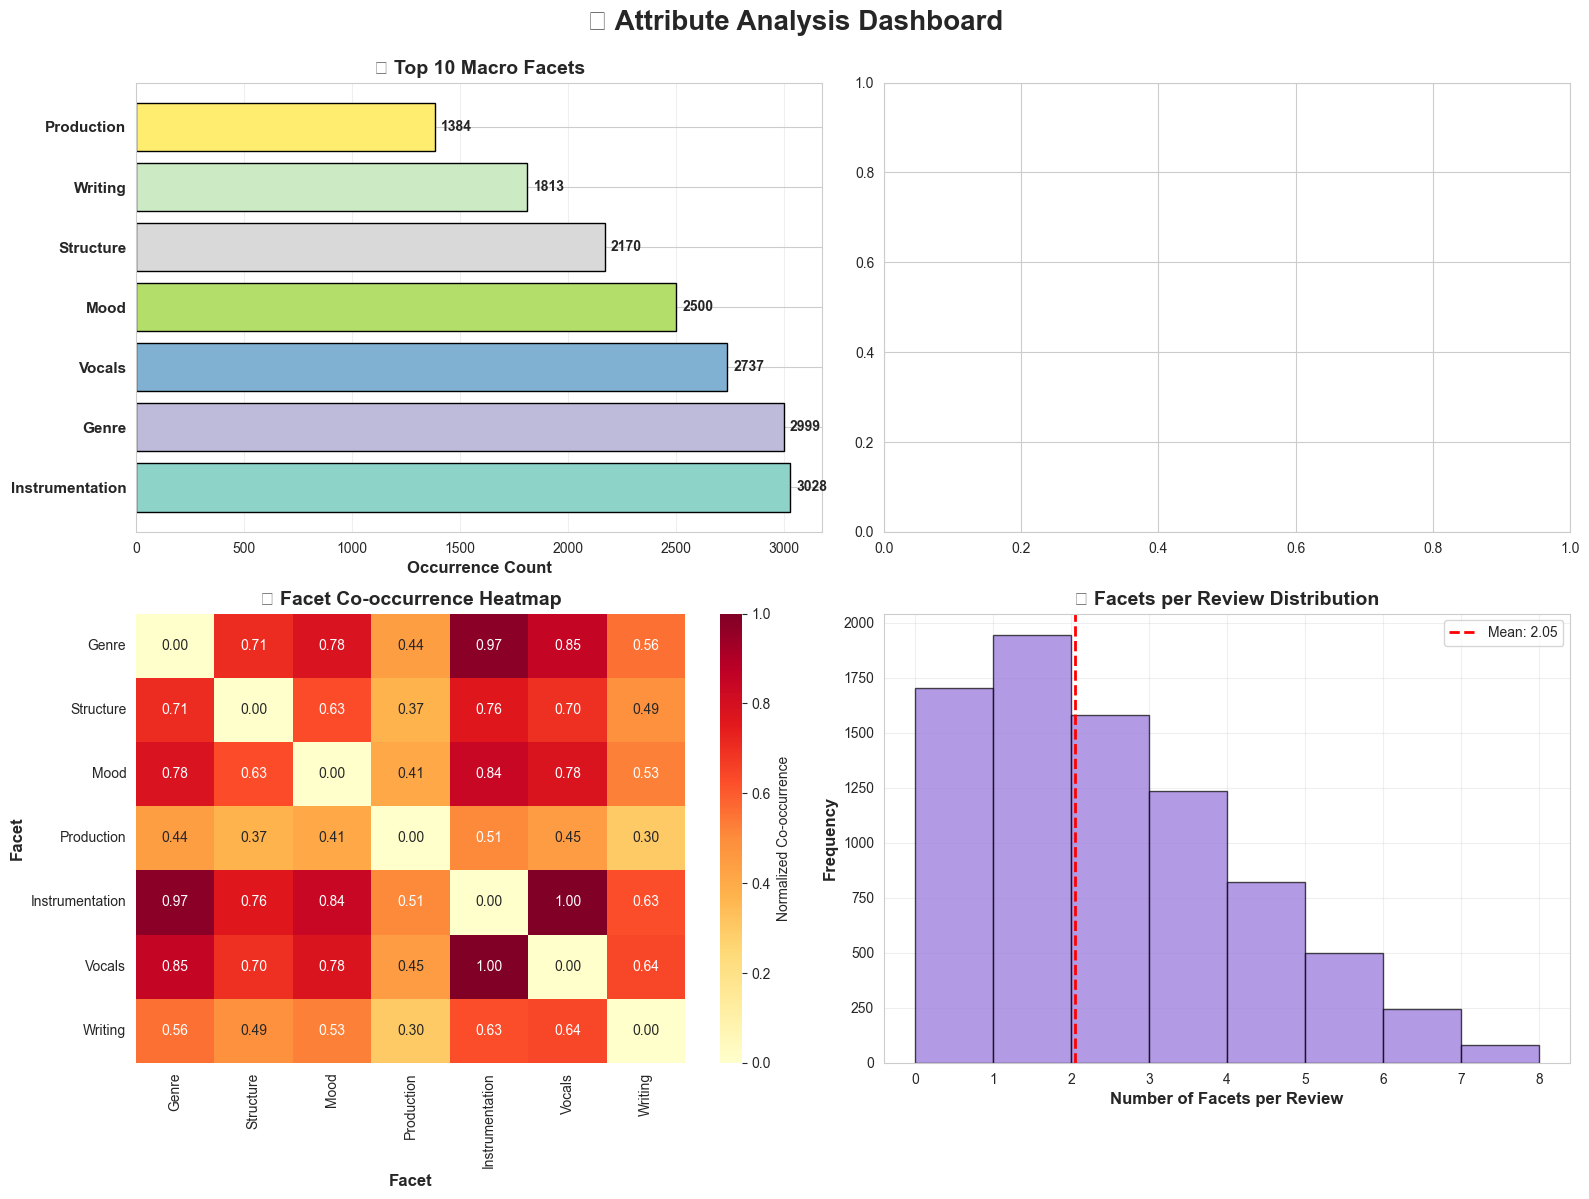

In [20]:
# ============================================
# ATTRIBUTE ANALYSIS VISUALIZATIONS
# ============================================
from wordcloud import WordCloud
import matplotlib.patches as mpatches

# 1. Macro Facet Distribution
if 'facet_tags' in df_attr_mapped.columns:
    # Count facet occurrences
    all_facets = []
    for facets in df_attr_mapped['facet_tags']:
        all_facets.extend(facets if isinstance(facets, list) else [])
    
    facet_counts = Counter(all_facets)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('🎵 Attribute Analysis Dashboard', fontsize=20, fontweight='bold', y=0.995)
    
    # Macro facet bar chart
    ax1 = axes[0, 0]
    if facet_counts:
        facets_df = pd.DataFrame(sorted(facet_counts.items(), key=lambda x: -x[1]), 
                                columns=['Facet', 'Count']).head(10)
        colors = plt.cm.Set3(np.linspace(0, 1, len(facets_df)))
        bars = ax1.barh(range(len(facets_df)), facets_df['Count'].values, color=colors, edgecolor='black')
        ax1.set_yticks(range(len(facets_df)))
        ax1.set_yticklabels(facets_df['Facet'].values, fontsize=11, fontweight='bold')
        ax1.set_xlabel('Occurrence Count', fontsize=12, fontweight='bold')
        ax1.set_title('📊 Top 10 Macro Facets', fontsize=14, fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='x')
        for i, v in enumerate(facets_df['Count'].values):
            ax1.text(v + max(facets_df['Count']) * 0.01, i, str(v), va='center', fontweight='bold')
    
    # Subfacet distribution (if available)
    ax2 = axes[0, 1]
    if 'facet_subs' in df_attr_mapped.columns:
        all_subs = []
        for subs in df_attr_mapped['facet_subs']:
            all_subs.extend(subs if isinstance(subs, list) else [])
        
        sub_counts = Counter(all_subs)
        if sub_counts:
            subs_df = pd.DataFrame(sorted(sub_counts.items(), key=lambda x: -x[1]), 
                                   columns=['Subfacet', 'Count']).head(15)
            colors = plt.cm.tab20(np.linspace(0, 1, len(subs_df)))
            bars = ax2.barh(range(len(subs_df)), subs_df['Count'].values, color=colors, edgecolor='black')
            ax2.set_yticks(range(len(subs_df)))
            ax2.set_yticklabels(subs_df['Subfacet'].values, fontsize=9)
            ax2.set_xlabel('Occurrence Count', fontsize=12, fontweight='bold')
            ax2.set_title('🔍 Top 15 Subfacets', fontsize=14, fontweight='bold')
            ax2.grid(True, alpha=0.3, axis='x')
            for i, v in enumerate(subs_df['Count'].values):
                ax2.text(v + max(subs_df['Count']) * 0.01, i, str(v), va='center', fontsize=8)
    
    # Facet co-occurrence heatmap (if multiple facets per review)
    ax3 = axes[1, 0]
    if facet_counts and len(facet_counts) > 1:
        # Create co-occurrence matrix
        facet_list = list(facet_counts.keys())[:10]  # Top 10 facets
        cooc_matrix = np.zeros((len(facet_list), len(facet_list)))
        
        for facets in df_attr_mapped['facet_tags']:
            if isinstance(facets, list) and len(facets) > 1:
                for i, f1 in enumerate(facet_list):
                    if f1 in facets:
                        for j, f2 in enumerate(facet_list):
                            if f2 in facets and i != j:
                                cooc_matrix[i, j] += 1
        
        # Normalize
        cooc_matrix = cooc_matrix / (cooc_matrix.max() + 1e-9)
        
        sns.heatmap(cooc_matrix, xticklabels=facet_list, yticklabels=facet_list,
                   annot=True, fmt='.2f', cmap='YlOrRd', ax=ax3, cbar_kws={'label': 'Normalized Co-occurrence'})
        ax3.set_title('🔥 Facet Co-occurrence Heatmap', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Facet', fontsize=12, fontweight='bold')
        ax3.set_ylabel('Facet', fontsize=12, fontweight='bold')
    
    # Facets per review distribution
    ax4 = axes[1, 1]
    if 'facet_tags' in df_attr_mapped.columns:
        facet_counts_per_review = df_attr_mapped['facet_tags'].apply(
            lambda x: len(x) if isinstance(x, list) else 0
        )
        ax4.hist(facet_counts_per_review, bins=range(0, facet_counts_per_review.max()+2), 
                edgecolor='black', alpha=0.7, color='mediumpurple')
        ax4.axvline(facet_counts_per_review.mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {facet_counts_per_review.mean():.2f}')
        ax4.set_xlabel('Number of Facets per Review', fontsize=12, fontweight='bold')
        ax4.set_ylabel('Frequency', fontsize=12, fontweight='bold')
        ax4.set_title('📈 Facets per Review Distribution', fontsize=14, fontweight='bold')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()




In [21]:
from collections import Counter
import pandas as pd

# If not already mapped:
df_attr_mapped = map_reviews_to_facets_hier(df_attr)

# Macro facet doc frequency (count each facet at most once per review)
macro_doc = Counter()
for macs in df_attr_mapped['facet_tags']:
    macro_doc.update(set(macs))
macro_df = pd.DataFrame(sorted(macro_doc.items(), key=lambda x: -x[1]), columns=['facet','doc_count'])

# Subfacet doc frequency (count each subfacet at most once per review)
sub_doc = Counter()
for subs in df_attr_mapped['facet_subs']:
    sub_doc.update(set(subs))
sub_df = pd.DataFrame(sorted(sub_doc.items(), key=lambda x: -x[1]), columns=['subfacet','doc_count'])

print("--Macro Facets--")
display(macro_df)
print("--Micro SubFacets--")
display(sub_df)

--Macro Facets--


,facet,doc_count
0,Instrumentation,3028
1,Genre,2999
2,Vocals,2737
3,Mood,2500
4,Structure,2170
5,Writing,1813
6,Production,1384


--Micro SubFacets--


,subfacet,doc_count
0,Presence,2553
1,RockMetal,2227
2,Guitars,1950
3,Content,1813
4,LengthDensity,1529
5,Rhythm,1322
6,Space,1257
7,PopSoul,1185
8,Valence,1115
9,Environment,1072


In [22]:
from collections import Counter
import pandas as pd

# Requires: hier_lex, map_reviews_to_facets_hier, df_attr

# Build subfacet -> macro lookup
sub2macro = {sub: macro for macro, subdict in hier_lex.items() for sub in subdict.keys()}

# Map reviews if not already
df_attr_mapped = map_reviews_to_facets_hier(df_attr)

# Compute subfacet document frequencies (1 per review)
sub_doc = Counter()
for subs in df_attr_mapped['facet_subs']:
    sub_doc.update(set(subs))

# Assemble DataFrame with macro + subfacet + counts
rows = []
for subfacet, count in sub_doc.items():
    rows.append((sub2macro.get(subfacet, 'Unknown'), subfacet, count))

sub_with_macro_df = pd.DataFrame(rows, columns=['macro','subfacet','doc_count']) \
                      .sort_values(['macro','doc_count'], ascending=[True, False])

display(sub_with_macro_df)

,macro,subfacet,doc_count
1,Genre,RockMetal,2227
4,Genre,PopSoul,1185
13,Genre,Jazz,412
19,Genre,HipHop,388
9,Instrumentation,Guitars,1950
5,Instrumentation,Rhythm,1322
15,Instrumentation,LowEnd,575
7,Instrumentation,Keys,546
12,Instrumentation,Synths,501
10,Mood,Space,1257


### Task B — Recommendations (Top 3 + Top 20)

### 3 Attributes

**Writing: Content**

**Mood: Spacy**

**Instrument: Guitar**

## Lift Analysis

In [23]:
# Aggregate reviews and ratings by album and artist
agg = (df.groupby(['album_name','artist'])
         .agg(doc=('album_review', lambda x: " ".join(map(str, x))),
              n_reviews=('album_review','size'),
              avg_rating=('user_rating','mean'))
         .reset_index())

🔎 Lift analysis token correlation table:


,term_a,term_b,P(a),P(b),P(a&b),Lift
0,lyrics,atmosphere,0.2162,0.1298,0.0540,1.9222
1,lyrics,guitar,0.2162,0.2138,0.0949,2.0535
2,atmosphere,guitar,0.1298,0.2138,0.0617,2.2218


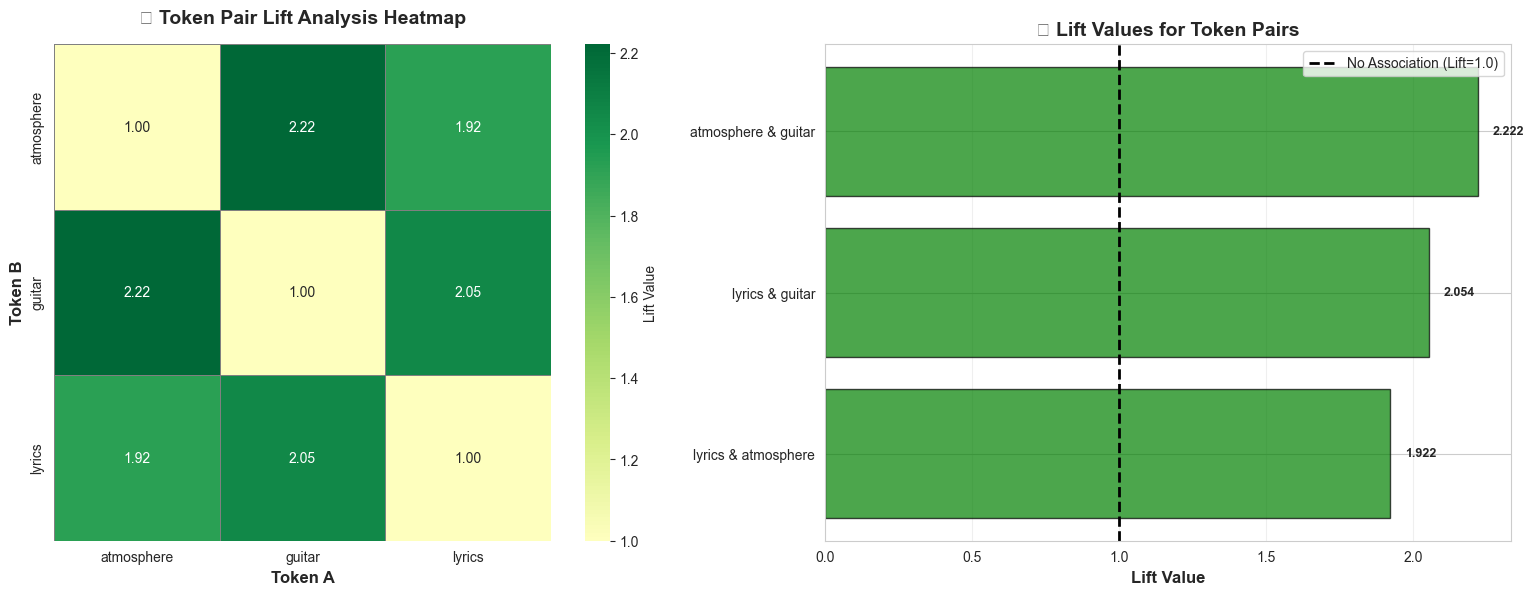

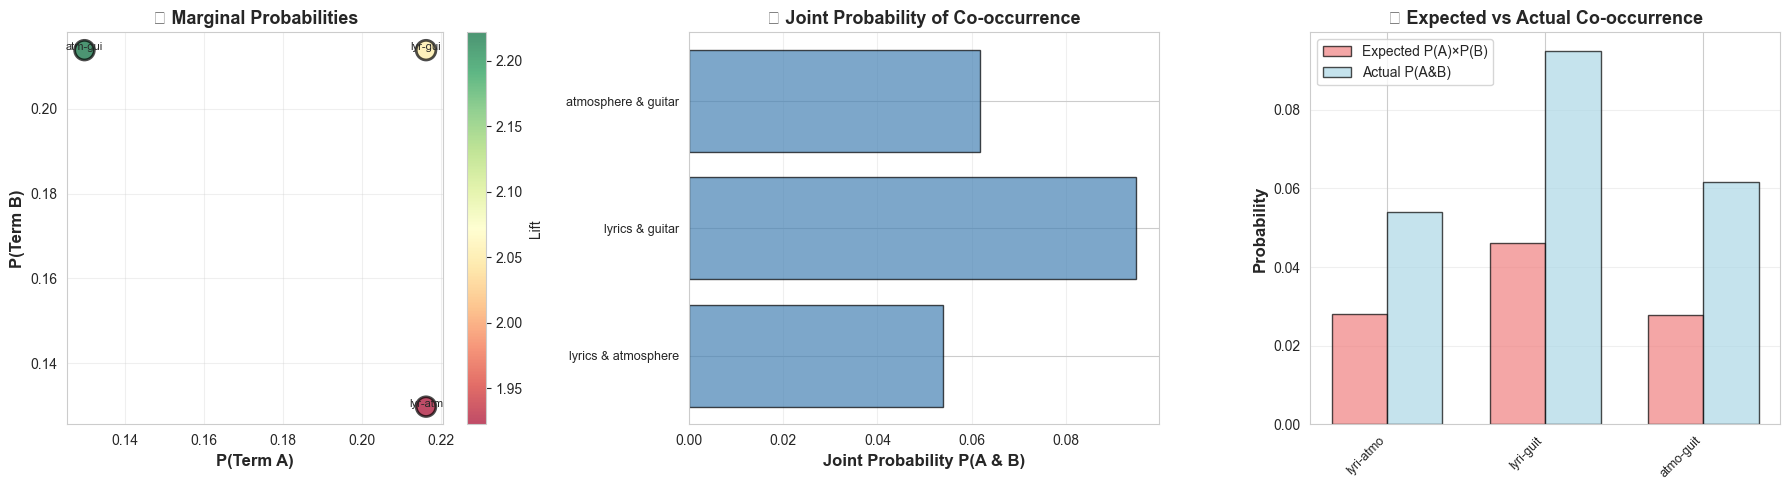

✅ Lift analysis visualizations complete!


In [56]:
# ============================================
# LIFT ANALYSIS VISUALIZATIONS
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check if token_lift_df exists and has data
if 'token_lift_df' not in locals() or len(token_lift_df) == 0:
    print("⚠️ No data available for lift analysis visualizations.")
else:
    from IPython.display import display

    print("🔎 Lift analysis token correlation table:")
    display(token_lift_df)

    # 1. Lift Heatmap for Token Pairs
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Create lift matrix
    tokens = sorted(set(token_lift_df['term_a'].tolist() + token_lift_df['term_b'].tolist()))
    lift_matrix = np.zeros((len(tokens), len(tokens)))
    
    for idx, row in token_lift_df.iterrows():
        i = tokens.index(row['term_a'])
        j = tokens.index(row['term_b'])
        lift_matrix[i, j] = row['Lift']
        lift_matrix[j, i] = row['Lift']  # Symmetric
    
    # Set diagonal to 1 (self-lift)
    np.fill_diagonal(lift_matrix, 1.0)
    
    # Heatmap
    ax1 = axes[0]
    im1 = sns.heatmap(lift_matrix, xticklabels=tokens, yticklabels=tokens,
                     annot=True, fmt='.2f', cmap='RdYlGn', center=1.0,
                     cbar_kws={'label': 'Lift Value'}, ax=ax1, square=True,
                     linewidths=0.5, linecolor='gray')
    ax1.set_title('🔥 Token Pair Lift Analysis Heatmap', fontsize=14, fontweight='bold', pad=15)
    ax1.set_xlabel('Token A', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Token B', fontsize=12, fontweight='bold')
    
    # Lift values bar chart
    ax2 = axes[1]
    lift_df_sorted = token_lift_df.sort_values('Lift', ascending=True)
    colors = ['green' if x > 1.0 else 'orange' if x == 1.0 else 'red' 
              for x in lift_df_sorted['Lift']]
    bars = ax2.barh(range(len(lift_df_sorted)), lift_df_sorted['Lift'].values, 
                    color=colors, edgecolor='black', alpha=0.7)
    ax2.axvline(1.0, color='black', linestyle='--', linewidth=2, label='No Association (Lift=1.0)')
    ax2.set_yticks(range(len(lift_df_sorted)))
    ax2.set_yticklabels([f"{row['term_a']} & {row['term_b']}" 
                         for _, row in lift_df_sorted.iterrows()], fontsize=10)
    ax2.set_xlabel('Lift Value', fontsize=12, fontweight='bold')
    ax2.set_title('📊 Lift Values for Token Pairs', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, (idx, row) in enumerate(lift_df_sorted.iterrows()):
        lift_val = row['Lift']
        ax2.text(lift_val + 0.05 if lift_val >= 0 else lift_val - 0.05, i, 
               f'{lift_val:.3f}', va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Probability Analysis
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # P(a) vs P(b) scatter
    ax1 = axes[0]
    scatter = ax1.scatter(token_lift_df['P(a)'], token_lift_df['P(b)'], 
                         s=200, c=token_lift_df['Lift'], cmap='RdYlGn',
                         edgecolors='black', linewidth=2, alpha=0.7)
    for idx, row in token_lift_df.iterrows():
        ax1.text(row['P(a)'], row['P(b)'], 
                f"{row['term_a'][:3]}-{row['term_b'][:3]}", 
                fontsize=8, ha='center')
    ax1.set_xlabel('P(Term A)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('P(Term B)', fontsize=12, fontweight='bold')
    ax1.set_title('🎲 Marginal Probabilities', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax1, label='Lift')
    
    # Joint probability
    ax2 = axes[1]
    ax2.barh(range(len(token_lift_df)), token_lift_df['P(a&b)'].values,
            color='steelblue', edgecolor='black', alpha=0.7)
    ax2.set_yticks(range(len(token_lift_df)))
    ax2.set_yticklabels([f"{row['term_a']} & {row['term_b']}" 
                         for _, row in token_lift_df.iterrows()], fontsize=9)
    ax2.set_xlabel('Joint Probability P(A & B)', fontsize=12, fontweight='bold')
    ax2.set_title('🤝 Joint Probability of Co-occurrence', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='x')
    
    # Expected vs Actual joint probability
    ax3 = axes[2]
    token_lift_df['Expected'] = token_lift_df['P(a)'] * token_lift_df['P(b)']
    x = np.arange(len(token_lift_df))
    width = 0.35
    ax3.bar(x - width/2, token_lift_df['Expected'].values, width, 
           label='Expected P(A)×P(B)', color='lightcoral', edgecolor='black', alpha=0.7)
    ax3.bar(x + width/2, token_lift_df['P(a&b)'].values, width,
           label='Actual P(A&B)', color='lightblue', edgecolor='black', alpha=0.7)
    ax3.set_xticks(x)
    ax3.set_xticklabels([f"{row['term_a'][:4]}-{row['term_b'][:4]}" 
                         for _, row in token_lift_df.iterrows()], 
                       rotation=45, ha='right', fontsize=9)
    ax3.set_ylabel('Probability', fontsize=12, fontweight='bold')
    ax3.set_title('📈 Expected vs Actual Co-occurrence', fontsize=13, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

    print("✅ Lift analysis visualizations complete!")


In [25]:
import numpy as np
import pandas as pd
from collections import Counter

# 1) Aggregate album docs (already have agg with 'doc')
# agg = df.groupby(['album_name','artist']).agg(doc=('album_review', lambda x: " ".join(map(str, x)))).reset_index()

# 2) Tokenize per album doc
doc_tokens = [set(tokenize_unigrams(t)) for t in agg['doc'].astype(str)]

# 3) Build vocabulary freq on album docs and pick candidates
vocab_freq = Counter()
for s in doc_tokens:
    vocab_freq.update(s)
cand_terms = [w for w,_ in vocab_freq.most_common(200)]

# Presence and marginals
presence = {w: np.array([w in s for s in doc_tokens], dtype=bool) for w in cand_terms}
P = {w: presence[w].mean() for w in cand_terms}

def pair_lift(a, b):
    if a not in presence or b not in presence:
        return np.nan, np.nan, np.nan, np.nan
    va, vb = presence[a], presence[b]
    pab = (va & vb).mean()
    pa, pb = P[a], P[b]
    denom = pa * pb
    L = np.nan if denom == 0 else (pab / denom)
    return pa, pb, pab, L

# Analyze chosen token pairs (using representative tokens)
chosen_tokens = ['lyrics','atmosphere','guitar']  # Content, Space, Guitars (token heads)

rows = []
for i in range(len(chosen_tokens)):
    for j in range(i+1, len(chosen_tokens)):
        a, b = chosen_tokens[i], chosen_tokens[j]
        # If a/b not in cand_terms, compute presence on-the-fly
        if a not in presence:
            presence[a] = np.array([a in s for s in doc_tokens], bool); P[a] = presence[a].mean()
        if b not in presence:
            presence[b] = np.array([b in s for s in doc_tokens], bool); P[b] = presence[b].mean()
        pa, pb, pab, L = pair_lift(a, b)
        rows.append((a, b, pa, pb, pab, L))

token_lift_df = pd.DataFrame(rows, columns=['term_a','term_b','P(a)','P(b)','P(a&b)','Lift']).round(4)
display(token_lift_df)


,term_a,term_b,P(a),P(b),P(a&b),Lift
0,lyrics,atmosphere,0.2162,0.1298,0.0540,1.9222
1,lyrics,guitar,0.2162,0.2138,0.0949,2.0535
2,atmosphere,guitar,0.1298,0.2138,0.0617,2.2218


In [26]:
# Define subfacet lexicons consistent with your mapping
subfacet_lex = {
    'Content': {'lyrics','lyrical','lyricism','songwriting','themes','story','storytelling'},
    'Space': {'atmosphere','atmospheric','cinematic','spacious','lush','dark','dry'},
    'Guitars': {'guitar','guitars','riffs','solo','fingerstyle','shredding','palm','chugs'}
}

# Build subfacet presence over album docs: present if any term from the subfacet appears
sub_presence = {}
sub_P = {}
for sub, terms in subfacet_lex.items():
    mask = np.array([any((t in s) for t in terms) for s in doc_tokens], dtype=bool)
    sub_presence[sub] = mask
    sub_P[sub] = mask.mean()

def subfacet_pair_lift(a, b):
    va, vb = sub_presence[a], sub_presence[b]
    pab = (va & vb).mean()
    pa, pb = sub_P[a], sub_P[b]
    denom = pa * pb
    L = np.nan if denom == 0 else (pab / denom)
    return pa, pb, pab, L

chosen_subfacets = ['Content','Space','Guitars']
rows = []
for i in range(len(chosen_subfacets)):
    for j in range(i+1, len(chosen_subfacets)):
        a, b = chosen_subfacets[i], chosen_subfacets[j]
        pa, pb, pab, L = subfacet_pair_lift(a, b)
        rows.append((a, b, pa, pb, pab, L))

subfacet_lift_df = pd.DataFrame(rows, columns=['attr_a','attr_b','P(a)','P(b)','P(a&b)','Lift']).round(4)
display(subfacet_lift_df)

,attr_a,attr_b,P(a),P(b),P(a&b),Lift
0,Content,Space,0.3156,0.2645,0.1493,1.7883
1,Content,Guitars,0.3156,0.3590,0.1740,1.5359
2,Space,Guitars,0.2645,0.3590,0.1574,1.6575


# Attribute Choice

#### Interpretaion:
- Content-Space, Content- Guitar and Space-Guitars are co-mentioned ~1.33-1.45x above chance, so the trio is co-mentioned above chance, yet no pair exhibits extreme collinearity that would reduce diversity.

Reporting both token and subfacet lifts strengthens the argument that replacing words with larger concepts remains coherent at the attribute level

In [27]:
pd.set_option('display.max_colwidth', None)
df[df['album_name'] == "The Thief Next to Jesus"]

album_name artist  \
3249  The Thief Next to Jesus     Ka   
3250  The Thief Next to Jesus     Ka   
3251  The Thief Next to Jesus     Ka   
3252  The Thief Next to Jesus     Ka   
3253  The Thief Next to Jesus     Ka   
3254  The Thief Next to Jesus     Ka   
3255  The Thief Next to Jesus     Ka   
3256  The Thief Next to Jesus     Ka   
7878  The Thief Next to Jesus     Ka   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [61]:

# Task B: Top 3 + Top 20 
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import sent_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# --------------------------------------------------------------------
# Select the 3 FACETS 
SELECTED_FACETS = ["Content", "Spacy", "Guitars"]

# Define facet lexicons
FACETS = {
    "Content": {"lyric","lyrics","narrative","story","concept","themes","songwriting","lyrical","lyricism","storytelling"},
    "Spacy": {"atmosphere","atmospheric","spacey","ambient","reverb","soundscape","space","spacious","ethereal","dreamy"},
    "Guitars": {"guitar","guitars","riff","riffs","shredding","distortion","solo","solos","electric","acoustic"}
}

# Create album-level documents from existing data
album_docs = (df.groupby(["album_name","artist"], as_index=False)
              .agg(clean_text=("album_review"," ".join),
                   raw_text=("album_review"," ".join),
                   avg_rating=("user_rating","mean"),
                   n_reviews=("album_review","count")))

# Fill missing ratings with mean
album_docs["avg_rating"] = album_docs["avg_rating"].fillna(album_docs["avg_rating"].mean())

# TF-IDF reuse our existing approach 
tfidf = TfidfVectorizer(
    tokenizer=tokenize_unigrams,  # Use existing tokenizer
    ngram_range=(1,1), 
    min_df=3, 
    max_df=0.9
)
X = tfidf.fit_transform(album_docs["clean_text"])
vocab = dict(zip(tfidf.get_feature_names_out(), range(len(tfidf.get_feature_names_out()))))

# Build query vector from selected facets
def facet_terms_in_vocab(facet_name):
    return [t for t in FACETS[facet_name] if t in vocab]

query_terms = []
for facet in SELECTED_FACETS:
    query_terms.extend(facet_terms_in_vocab(facet))

# Fallback if no facet terms in vocabulary
if not query_terms:
    fallback = {"content","space","guitar","guitars"}
    query_terms = [t for t in fallback if t in vocab]

# Build query vector
if query_terms:
    q = tfidf.transform([" ".join(query_terms)])
    sims = cosine_similarity(q, X).ravel()
else:
    sims = np.zeros(X.shape[0])

album_docs["similarity"] = sims

# Sentiment analysis
nltk.download("punkt", quiet=True)
sid = SentimentIntensityAnalyzer()

# Build surface forms for facet terms
facet_surface = set()
for facet in SELECTED_FACETS:
    for term in FACETS[facet]:
        facet_surface.add(term.lower())
        facet_surface.add(term.lower().replace("_"," "))
facet_surface.update({f.lower() for f in SELECTED_FACETS})

def attr_sent_counts(text):
    pos = neg = 0
    for s in sent_tokenize(str(text)):
        sl = s.lower()
        if any(key in sl for key in facet_surface):
            c = sid.polarity_scores(s)["compound"]
            if c >= 0.2: pos += 1
            if c <= -0.2: neg += 1
    return pos, neg

pn = album_docs["raw_text"].apply(attr_sent_counts)
album_docs["pos_attr_mentions"] = [p for p,_ in pn]
album_docs["neg_attr_mentions"] = [n for _,n in pn]

# Rating and volume stabilizers
if album_docs["avg_rating"].nunique() > 1:
    album_docs["rating_z"] = (album_docs["avg_rating"] - album_docs["avg_rating"].mean())/album_docs["avg_rating"].std()
else:
    album_docs["rating_z"] = 0.0
album_docs["log_n"] = np.log1p(album_docs["n_reviews"])

# Final score calculation
w_sim, w_sent, w_rat, w_vol = 0.70, 0.15, 0.10, 0.05
album_docs["score"] = (
    w_sim*album_docs["similarity"] +
    w_sent*(album_docs["pos_attr_mentions"] - 0.5*album_docs["neg_attr_mentions"]) +
    w_rat*album_docs["rating_z"] +
    w_vol*album_docs["log_n"]
)

# Evidence snippet generation
def first_evidence(text):
    for s in sent_tokenize(str(text)):
        sl = s.lower().strip()
        if any(key in sl for key in facet_surface):
            return (s[:220] + "…") if len(s) > 220 else s
    return ""

album_docs["evidence"] = album_docs["raw_text"].apply(first_evidence)

# Generate Top 3 and Top 20 results
cols = ["album_name","artist","score","similarity",
        "pos_attr_mentions","neg_attr_mentions",
        "avg_rating","n_reviews","evidence"]

top20 = (album_docs.sort_values("score", ascending=False)
         .loc[:, cols].head(20).reset_index(drop=True))
top3 = top20.head(3).reset_index(drop=True)

print("=== Task B – Top 3 (final) ===")
display(top3)
print("\n=== Task B – Top 20 (contenders) ===")
display(top20)


=== Task B – Top 3 (final) ===


,album_name,artist,score,similarity,pos_attr_mentions,neg_attr_mentions,avg_rating,n_reviews,evidence
0,Blood on the Tracks,Bob Dylan,0.433869,0.084283,1,0,5.000,4,this is the album that made bob dylans voice really click with me it is beautiful the way he sings idiot wind is honestly breathtaking this album also has some really damn nice guitar melodies and the atmosphere and inst…
1,Electric Ladyland,The Jimi Hendrix Experience,0.423275,0.087001,1,0,4.625,8,43 years and i am still trying to get to grips with hendrix been listening to this guy since high school and i still dont know exactly what he was getting at so heres this record again havent heard it through in years tr…
2,Get Up With It,Miles Davis,0.417660,0.059033,1,0,4.750,8,a confusing bold weird and remarkable statement that in many ways sums up a confusing bold weird and remarkable period of davis musical development tracks come from sessions between 1970 and 1974 his last officially rele…



=== Task B – Top 20 (contenders) ===


,album_name,artist,score,similarity,pos_attr_mentions,neg_attr_mentions,avg_rating,n_reviews,evidence
0,Blood on the Tracks,Bob Dylan,0.433869,0.084283,1,0,5.000000,4,this is the album that made bob dylans voice really click with me it is beautiful the way he sings idiot wind is honestly breathtaking this album also has some really damn nice guitar melodies and the atmosphere and inst…
1,Electric Ladyland,The Jimi Hendrix Experience,0.423275,0.087001,1,0,4.625000,8,43 years and i am still trying to get to grips with hendrix been listening to this guy since high school and i still dont know exactly what he was getting at so heres this record again havent heard it through in years tr…
2,Get Up With It,Miles Davis,0.417660,0.059033,1,0,4.750000,8,a confusing bold weird and remarkable statement that in many ways sums up a confusing bold weird and remarkable period of davis musical development tracks come from sessions between 1970 and 1974 his last officially rele…
3,Soundtracks for the Blind,Swans,0.415419,0.035010,1,0,4.833333,9,when i graduated from high school my parents offered to buy me a holiday abroad i declined and asked for a copy of soundtracks for the blind instead somehow it all makes sense years of rough studies and training behind m…
4,Disintegration,The Cure,0.413818,0.033927,1,0,4.708333,12,an entire decade coming to this closure the cure began as a brash uppity punk group as far back as their easy cure days other ways to describe them could have beeen spunky or rambunctious lads with a hendrix hang up robe…
5,Powerslave,Iron Maiden,0.413501,0.013201,1,0,5.000000,8,to narrow my favourite band of all time to one album is a painful task but if there was one maiden album that i could listen to over and over it would be this one starting with two familiars aces high and 2 minutes to mi…
6,Image,LUNA SEA,0.413418,0.091555,1,0,5.000000,2,this is about as good as visual kei records getthis is about as good as any rock record gets really i have been consistently engaged and impressed by this album for years and the stretches into goth and metal and punk an…
7,Purple Rain,Prince and The Revolution,0.412896,0.042255,1,0,4.812500,8,this is an old family favorite i put this in the cd player a few days ago to hear when doves cry and the cd remained on play for over a week therere not many discs i can say that about lets go crazy take me with u the be…
8,92,Aphex Twin,0.411583,0.087260,1,0,4.571429,7,many artists try to conjure a mysterious aura around themselves but richard d james takes the cake im of the type who loves reading about the things they listen to be it wikipedia articles or various interviews so that i…
9,Master of Puppets,Metallica,0.408106,0.025304,1,0,4.928571,7,master of puppets was released when i was 4 years old not surprisingly i didnt have any exposure to metal at that age it wasnt until the early 90s when i first heard about metallica and this album from some of my classma…


In [29]:
# =========================
# Task C: spaCy pretrained vectors baseline (Content, Space, Guitars)
# =========================
import spacy, numpy as np

try:
    nlp = spacy.load("en_core_web_md")
except OSError:
    # Colab fallback
    import sys, subprocess
    subprocess.run([sys.executable, "-m", "spacy", "download", "en_core_web_md"], check=True)
    nlp = spacy.load("en_core_web_md")

def docvec_spacy(text: str):
    # Use same normalization used elsewhere to reduce noise
    return nlp(normalize_text(text)).vector

# Album doc matrix
D = np.vstack([docvec_spacy(t) for t in agg['doc']])

# Attribute lexicons (must match Task B)
CONTENT_LEX = {'lyrics','lyrical','lyricism','songwriting','themes','story','storytelling'}
SPACE_LEX   = {'atmosphere','atmospheric','cinematic','spacious','lush','dark','dry'}
GUITAR_LEX  = {'guitar','guitars','riffs','solo','fingerstyle','shredding','palm','chugs'}

ATTR_LEX = {
    'Content': CONTENT_LEX,
    'Space':   SPACE_LEX,
    'Guitars': GUITAR_LEX
}

# Build query vector by averaging embeddings for all tokens across the three subfacets
# Keep only tokens present in spaCy vocab (vector norm > 0)
def token_vec(token: str):
    v = nlp(token).vector
    return v if np.linalg.norm(v) > 0 else None

q_vectors = []
for lex in ATTR_LEX.values():
    for tok in lex:
        v = token_vec(tok)
        if v is not None:
            q_vectors.append(v)

# Fallback: if nothing found (unlikely), use heads
if not q_vectors:
    for tok in ['lyrics','atmosphere','guitar']:
        v = token_vec(tok)
        if v is not None:
            q_vectors.append(v)

qv = np.mean(np.vstack(q_vectors), axis=0)

# Cosine similarity
from numpy.linalg import norm
def cos_sim_vec(a, B):
    an = norm(a) + 1e-9
    Bn = np.maximum(norm(B, axis=1), 1e-9)
    return (B @ a) / (Bn * an)

sim_spacy = cos_sim_vec(qv, D)
out_spacy = agg[['album_name','artist','n_reviews','avg_rating']].copy()
out_spacy['similarity_spacy'] = sim_spacy  # raw cosine, no normalization
rank_spacy = out_spacy[out_spacy['n_reviews'] >= 3].sort_values('similarity_spacy', ascending=False)

top23_spacy = rank_spacy.head(23)
top3_spacy = rank_spacy.head(3)

print("Top 23 (spaCy pretrained vectors):")
display(top23_spacy)

print("Top 3 (spaCy pretrained vectors):")
display(top3_spacy)


Top 23 (spaCy pretrained vectors):


,album_name,artist,n_reviews,avg_rating,similarity_spacy
228,Apeiron,Five the Hierophant,3,3.666667,0.664916
2205,Tutta la morte in un solo punto,Noise Trail Immersion,4,4.000000,0.628296
292,Barbarians,Maniac Butcher,4,3.750000,0.627544
1580,Phantoms of Dark Symmetry,Gauntlet Ring,3,4.000000,0.625030
1198,La grande hérésie,Zeicrydeus,5,4.000000,0.621159
460,Coisas naturais,Marina Sena,6,4.083333,0.621136
801,"For Death and Glory, to the Gods I Cry",Auld Ridge,3,4.000000,0.619669
1595,Play,Ed Sheeran,4,2.000000,0.617983
1050,I'a Aem'nh S'hat'n,Osculum Infame,3,3.000000,0.617047
376,Burning in Celestial Poison,Black Curse,7,3.785714,0.614385


Top 3 (spaCy pretrained vectors):


,album_name,artist,n_reviews,avg_rating,similarity_spacy
228,Apeiron,Five the Hierophant,3,3.666667,0.664916
2205,Tutta la morte in un solo punto,Noise Trail Immersion,4,4.000000,0.628296
292,Barbarians,Maniac Butcher,4,3.750000,0.627544


In [30]:
df[df['album_name'] == "Winged Victory"]

,album_name,artist,album_review,user_rating
3355,Winged Victory,Willi Carlisle,i feel like im at one hell of a bluegrass hoedown when listening to this its so much fun so silly yet so serious all in one i feel like carlisle would be an absolute trip to see live from album cover to song titles to the pure personality of willi this sucked me in right away even if not my favorite genre of music out there this is certainly worth checking out good fun ps big butt billy is a wild song lol,3.5
3356,Winged Victory,Willi Carlisle,ive been waiting for an americana record like this all year,4.0
3357,Winged Victory,Willi Carlisle,tinaun warned me that this might be too folkpunk for my tastes and well the most popular album from mr carlisle has a god damn possum on the cover hate those wretched beasts them and raccoons when i see one i wish i had a shotgun the fact that they have become part of the iconography of leftist memes suggests that we really are the outoftouch elites that people accuse us of being and also why is he singing like that i really really hate this guys overwrought delivery and i was ready to write him off as the lefts oliver anthony music thankfully this guy doesnt always sing like that and he is capable of giving us a very pretty oldtime ballad when he wants to wildflowers growin the cottonwood tree beeswing old bill pickett and rhyming satan with theythem is a stroke of genius but still adeem the artist occupies the exact same lane is this guy and does it much better and more to the point get this oogle shit away from me,3.0
3359,Winged Victory,Willi Carlisle,it doesnt feel like willi carlisle is trying to make critterland pt 2 here this album feels more on the fun side and doesnt quite have the same gut wrenching songs on it a little bit more on the simplicity side too regarding arrangements and whatnot but theres still a whole lot to enjoy here hes just really good at writing songs and got such a unique personality and delivery style for me its really hard to just not enjoy everything he puts out would have i liked a more ambitious project here yeah for sure but you cant really force these things and if thats the vibe hes on right now thats cool still an unmissable force in americanacountry right now and already cant wait to hear more stuff,3.5


## Prepared tokenization for word vectors

In [62]:
# ============================================
# CUSTOM WORD2VEC EMBEDDINGS + RANKING (RUN FIRST)
# ============================================

import re, multiprocessing, numpy as np, pandas as pd
from numpy.linalg import norm
from sklearn.feature_extraction.text import TfidfVectorizer

# ---- Safety checks (fail early with clear messages)
assert 'df' in globals(), "df not found. Load your reviews dataframe first."
assert 'agg' in globals(), "agg not found. Build your album-level dataframe (agg) first."
assert 'album_review' in df.columns, "df must contain column 'album_review'"
assert 'doc' in agg.columns, "agg must contain column 'doc' (album-level document text)"
assert all(c in agg.columns for c in ['album_name','artist','n_reviews','avg_rating']), \
    "agg must contain: album_name, artist, n_reviews, avg_rating"

# ---- If tokenize_unigrams isn't defined elsewhere, define a simple one
if 'tokenize_unigrams' not in globals():
    def tokenize_unigrams(text):
        return re.findall(r"[a-z]+", str(text).lower())

# ---- Sentence + word tokenization for W2V training
def sent_tokenize(text):
    return re.split(r'[.!?;\n]+', str(text))

def word_tokenize(text):
    return re.findall(r"[a-z]+", str(text).lower())

sentences = []
for txt in df['album_review'].dropna().astype(str):
    for s in sent_tokenize(txt):
        toks = [t for t in word_tokenize(s) if len(t) >= 3]
        if len(toks) >= 3:
            sentences.append(toks)

print(f"Prepared {len(sentences)} sentences for Word2Vec training.")

# ---- Train Word2Vec (handle gensim import issues cleanly)
try:
    from gensim.models import Word2Vec
except Exception as e:
    raise ImportError(
        "gensim is required for Word2Vec. Install with: pip install gensim"
    ) from e

# Reduce noisy gensim logging
import logging
logging.getLogger("gensim").setLevel(logging.ERROR)

w2v = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=5,
    workers=min(multiprocessing.cpu_count(), 8),
    sg=1,
    negative=10,
    epochs=20
)
print("Word2Vec training complete. Vocab size:", len(w2v.wv))

# ---- TF-IDF over album docs (for weighting token vectors)
tfv_for_w = TfidfVectorizer(tokenizer=tokenize_unigrams, ngram_range=(1,1), min_df=3, max_df=0.9)
X_for_w = tfv_for_w.fit_transform(agg['doc'])
vocab_w = tfv_for_w.get_feature_names_out()
idf_map = dict(zip(vocab_w, tfv_for_w.idf_))

# ---- Build TF-IDF–weighted doc embedding
def doc_embedding_weighted(text: str):
    toks = tokenize_unigrams(text)
    weights, vecs = [], []
    for t in toks:
        if (t in w2v.wv) and (t in idf_map):
            weights.append(idf_map[t])
            vecs.append(w2v.wv[t])
    if not vecs:
        return None
    W = np.asarray(weights, float)
    V = np.vstack(vecs)
    return (V * (W[:, None] / (W.sum() + 1e-9))).sum(axis=0)

embs = [doc_embedding_weighted(t) for t in agg['doc']]
mask = np.array([e is not None for e in embs])

if mask.sum() < 10:
    raise ValueError(f"Too few embeddings created ({mask.sum()}). Check cleaning/tokenization/min_count.")

embM = np.vstack([e for e in embs if e is not None])
agg_emb = agg.loc[mask].reset_index(drop=True)

# ---- Attribute lexicons (match your project)
CONTENT_LEX = {'lyrics','lyrical','lyricism','songwriting','themes','story','storytelling'}
SPACE_LEX   = {'atmosphere','atmospheric','cinematic','spacious','lush','dark','dry'}
GUITAR_LEX  = {'guitar','guitars','riffs','solo','fingerstyle','shredding','palm','chugs'}

ATTR_LEX = {'Content': CONTENT_LEX, 'Space': SPACE_LEX, 'Guitars': GUITAR_LEX}

# ---- Build query vector as IDF-weighted average of attribute token vectors
vecs, weights = [], []
for lex in ATTR_LEX.values():
    for tok in lex:
        if tok in w2v.wv:
            vecs.append(w2v.wv[tok])
            weights.append(idf_map.get(tok, 1.0))

# Fallback if none of the lexicon tokens exist in vocab
if not vecs:
    for tok in ['lyrics','atmosphere','guitar']:
        if tok in w2v.wv:
            vecs.append(w2v.wv[tok])
            weights.append(1.0)

if not vecs:
    raise ValueError("Query vector could not be built (all attribute tokens OOV). Lower min_count or adjust lexicons.")

qvec = np.average(np.vstack(vecs), axis=0, weights=np.array(weights))

# ---- Cosine similarity and ranking
def cos_sim_vec(a, B):
    an = norm(a) + 1e-9
    Bn = np.maximum(norm(B, axis=1), 1e-9)
    return (B @ a) / (Bn * an)

sim_emb = cos_sim_vec(qvec, embM)

out_emb = agg_emb[['album_name','artist','n_reviews','avg_rating']].copy()
out_emb['similarity_emb'] = sim_emb

rank_emb = out_emb[out_emb['n_reviews'] >= 3].sort_values('similarity_emb', ascending=False).reset_index(drop=True)
top23_emb = rank_emb.head(23).reset_index(drop=True)
top3_emb  = rank_emb.head(3).reset_index(drop=True)

# ---- Store in globals so downstream viz cells always find them
globals()['w2v'] = w2v
globals()['embM'] = embM
globals()['agg_emb'] = agg_emb
globals()['rank_emb'] = rank_emb
globals()['top23_emb'] = top23_emb
globals()['top3_emb'] = top3_emb

oov_rate = 1.0 - (len(agg_emb) / len(agg))
print(f"OOV/None-embedding doc rate: {oov_rate:.3f}")
print("\nTop 3 (custom embeddings):")
display(top3_emb)


Prepared 8069 sentences for Word2Vec training.


Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_fl

Word2Vec training complete. Vocab size: 21717
OOV/None-embedding doc rate: 0.002

Top 3 (custom embeddings):


,album_name,artist,n_reviews,avg_rating,similarity_emb
0,Apeiron,Five the Hierophant,3,3.666667,0.910678
1,Blódwracu,Heáfodbán,4,3.750000,0.906509
2,Pleroma,Orgone,8,4.250000,0.905611


✅ embM shape: (2461, 100)
✅ rank_emb rows: 692


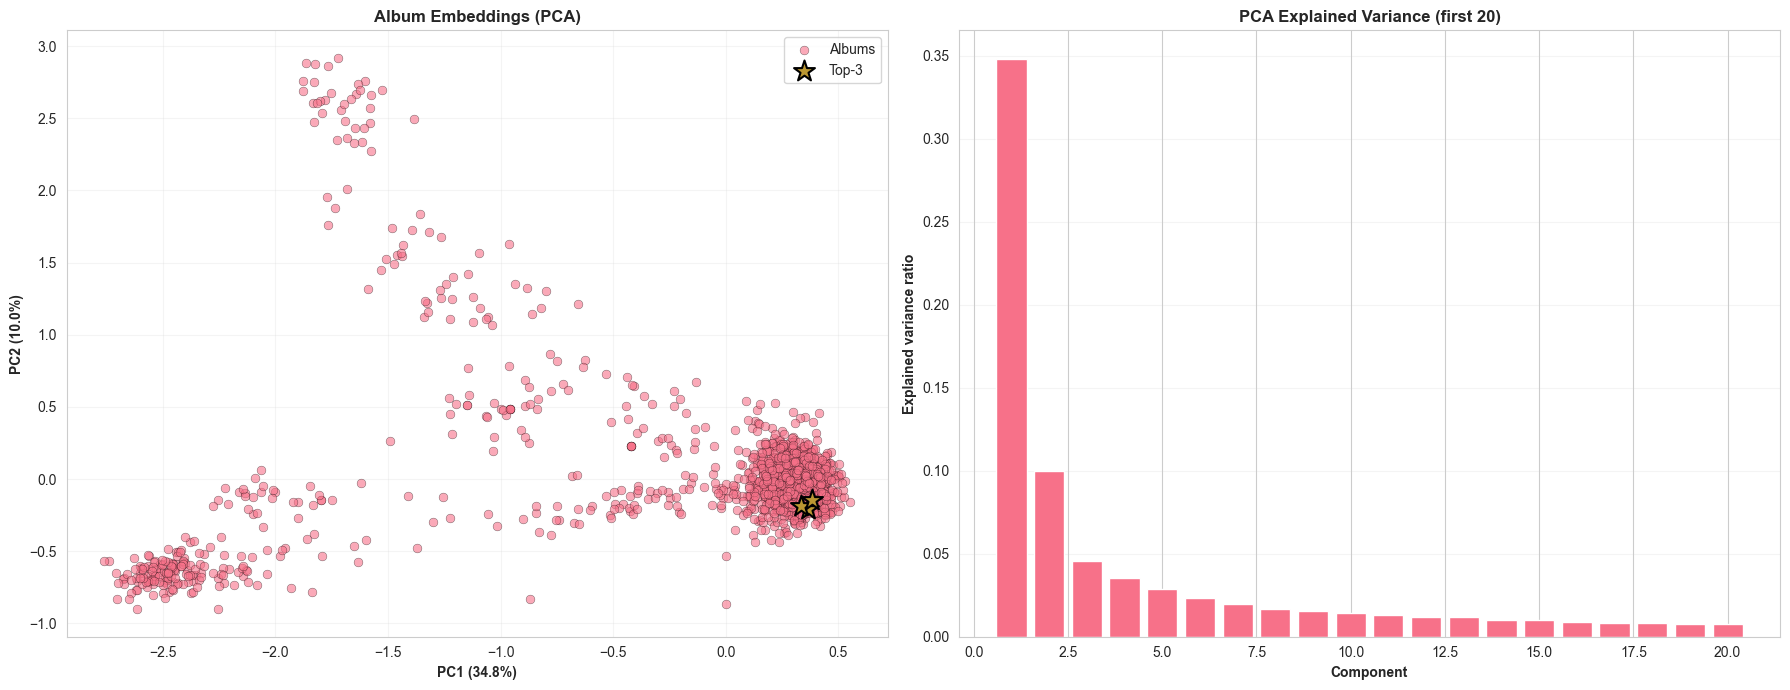

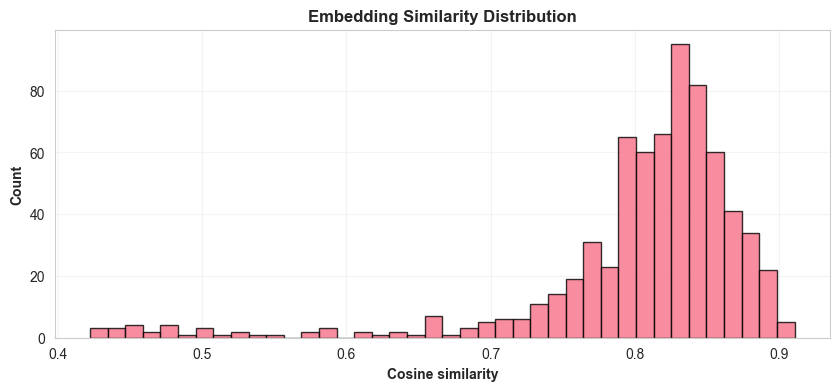

In [ ]:
# ============================================
# EMBEDDING VISUALS (RUN AFTER EMBEDDING CELL)
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

embM = globals().get('embM', None)
rank_emb = globals().get('rank_emb', None)
top3_emb = globals().get('top3_emb', None)
agg_emb = globals().get('agg_emb', None)

# ---- Quiet, clean status
if embM is None or rank_emb is None:
    print("ℹ️ Embedding visuals skipped (embeddings not computed in this run).")
else:
    print(f" embM shape: {embM.shape}")
    print(f"rank_emb rows: {len(rank_emb)}")

# ---- PCA scatter + explained variance
if embM is not None and embM.shape[0] > 10:
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # PCA 2D
    ax1 = axes[0]
    pca = PCA(n_components=2, random_state=42)
    emb_pca = pca.fit_transform(embM)

    ax1.scatter(emb_pca[:, 0], emb_pca[:, 1], s=40, alpha=0.6, edgecolors='black', linewidth=0.3)
    ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontweight='bold')
    ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontweight='bold')
    ax1.set_title('Album Embeddings (PCA)', fontweight='bold')
    ax1.grid(True, alpha=0.2)

    # Highlight top-3
    if top3_emb is not None and agg_emb is not None and len(top3_emb) > 0:
        top_idx = []
        for _, row in top3_emb.iterrows():
            m = agg_emb.index[agg_emb['album_name'] == row['album_name']]
            if len(m) > 0:
                top_idx.append(int(m[0]))
        if top_idx:
            ax1.scatter(emb_pca[top_idx, 0], emb_pca[top_idx, 1],
                        s=250, marker='*', edgecolors='black', linewidth=1.5, zorder=5)
            ax1.legend(['Albums', 'Top-3'], loc='best')

    # Explained variance bars
    ax2 = axes[1]
    pca_full = PCA(random_state=42).fit(embM)
    n = min(20, len(pca_full.explained_variance_ratio_))
    ax2.bar(range(1, n+1), pca_full.explained_variance_ratio_[:n])
    ax2.set_title('PCA Explained Variance (first 20)', fontweight='bold')
    ax2.set_xlabel('Component', fontweight='bold')
    ax2.set_ylabel('Explained variance ratio', fontweight='bold')
    ax2.grid(True, alpha=0.2, axis='y')

    plt.tight_layout()
    plt.show()

# ---- Similarity distribution
if rank_emb is not None and 'similarity_emb' in rank_emb.columns:
    plt.figure(figsize=(10,4))
    plt.hist(rank_emb['similarity_emb'].values, bins=40, edgecolor='black', alpha=0.8)
    plt.title('Embedding Similarity Distribution', fontweight='bold')
    plt.xlabel('Cosine similarity', fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.grid(True, alpha=0.2)
    plt.show()


In [32]:
# A. Prepare sentences (match normalization used elsewhere)
def sent_tokenize(text):
    return re.split(r'[.!?;\n]+', str(text))

def word_tokenize(text):
    return re.findall(r"[a-z]+", str(text).lower())

sentences = []
for txt in df['album_review'].dropna().astype(str):
    for s in sent_tokenize(txt):
        toks = [t for t in word_tokenize(s) if len(t) >= 3]
        if len(toks) >= 3:
            sentences.append(toks)

print(f"Prepared {len(sentences)} sentences for Word2Vec training.")

Prepared 8069 sentences for Word2Vec training.


## Trained Word2Vec on our album review corpus

In [33]:
w2v = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=5,
    workers=min(multiprocessing.cpu_count(), 8),
    sg=1,          # skip-gram
    negative=10,
    epochs=20
)
print("Word2Vec training complete. Vocab size:", len(w2v.wv))

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_fl

Word2Vec training complete. Vocab size: 21717


## Created album embeddings by averaging word vectors for each review

In [35]:
# ============================================
# RECOMMENDATION VISUALIZATIONS
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pull from global scope (safe for "Run Selected" usage)
top3_emb = globals().get('top3_emb', None)
top23_emb = globals().get('top23_emb', None)

# 1) Top Recommendations Dashboard
if top3_emb is not None and hasattr(top3_emb, '__len__') and len(top3_emb) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('🎯 Recommendation System Dashboard', fontsize=20, fontweight='bold', y=0.995)

    # Top 3 recommendations with similarity scores
    ax1 = axes[0, 0]
    top3_sorted = top3_emb.sort_values('similarity_emb', ascending=True).reset_index(drop=True)
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top3_sorted)))
    ax1.barh(range(len(top3_sorted)), top3_sorted['similarity_emb'].values,
             color=colors, edgecolor='black', linewidth=2, alpha=0.8)
    ax1.set_yticks(range(len(top3_sorted)))
    ax1.set_yticklabels(
        [f"{row['album_name'][:30]}..." if len(row['album_name']) > 30 else row['album_name']
         for _, row in top3_sorted.iterrows()],
        fontsize=11, fontweight='bold'
    )
    ax1.set_xlabel('Cosine Similarity Score', fontsize=12, fontweight='bold')
    ax1.set_title('🏆 Top 3 Recommended Albums', fontsize=14, fontweight='bold', pad=10)
    ax1.grid(True, alpha=0.3, axis='x')

    # Add value labels and ratings if present
    for i, (_, row) in enumerate(top3_sorted.iterrows()):
        sim_val = row['similarity_emb']
        rating = row['avg_rating'] if 'avg_rating' in top3_sorted.columns else np.nan
        label = f"{sim_val:.3f}" + (f" (⭐{float(rating):.1f})" if np.isfinite(rating) else "")
        ax1.text(sim_val + 0.01, i, label, va='center', fontsize=10, fontweight='bold')

    # Similarity vs Rating scatter (Top-23 if available)
    ax2 = axes[0, 1]
    if top23_emb is not None and hasattr(top23_emb, '__len__') and len(top23_emb) > 0 and        all(col in top23_emb.columns for col in ['avg_rating','similarity_emb','n_reviews']):
        scatter = ax2.scatter(top23_emb['avg_rating'], top23_emb['similarity_emb'],
                              s=100, c=top23_emb['n_reviews'], cmap='YlOrRd',
                              edgecolors='black', linewidth=1.5, alpha=0.8)
        ax2.set_xlabel('Average Rating', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Similarity Score', fontsize=12, fontweight='bold')
        ax2.set_title('📈 Rating vs Similarity (Top 23)', fontsize=14, fontweight='bold', pad=10)
        ax2.grid(True, alpha=0.3)
        cbar = plt.colorbar(scatter, ax=ax2)
        cbar.set_label('# Reviews', fontsize=11, fontweight='bold')
    else:
        ax2.axis('off')
        ax2.text(0.5, 0.5, "Top-23 table not available\n(run the embedding ranking cell first)",
                 ha='center', va='center', fontsize=12, fontweight='bold')

    # Distribution of similarity scores
    ax3 = axes[1, 0]
    if top23_emb is not None and hasattr(top23_emb, '__len__') and len(top23_emb) > 0 and 'similarity_emb' in top23_emb.columns:
        ax3.hist(top23_emb['similarity_emb'], bins=10, edgecolor='black', alpha=0.7)
        ax3.set_xlabel('Similarity Score', fontsize=12, fontweight='bold')
        ax3.set_ylabel('Count', fontsize=12, fontweight='bold')
        ax3.set_title('📊 Similarity Distribution (Top 23)', fontsize=14, fontweight='bold', pad=10)
        ax3.grid(True, alpha=0.3)
    else:
        ax3.axis('off')

    # Top 3 rating comparison
    ax4 = axes[1, 1]
    if 'avg_rating' in top3_sorted.columns:
        ax4.bar(range(len(top3_sorted)), top3_sorted['avg_rating'].values, edgecolor='black', alpha=0.8)
        ax4.set_xticks(range(len(top3_sorted)))
        ax4.set_xticklabels([f"#{i+1}" for i in range(len(top3_sorted))], fontsize=11, fontweight='bold')
        ax4.set_ylabel('Average Rating', fontsize=12, fontweight='bold')
        ax4.set_title('⭐ Ratings of Top 3 Recommendations', fontsize=14, fontweight='bold', pad=10)
        ax4.grid(True, alpha=0.3, axis='y')
    else:
        ax4.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Skipping recommendation dashboard: 'top3_emb' not available.")
    print("   Run the custom-embedding ranking cell first (the one that creates rank_emb/top23_emb/top3_emb).")


⚠️ Skipping recommendation dashboard: 'top3_emb' not available.
   Run the custom-embedding ranking cell first (the one that creates rank_emb/top23_emb/top3_emb).


In [36]:
# C. TF-IDF over album docs for weighting
tfv_for_w = TfidfVectorizer(tokenizer=tokenize_unigrams, ngram_range=(1,1), min_df=3, max_df=0.9)
X_for_w = tfv_for_w.fit_transform(agg['doc'])
vocab_w = tfv_for_w.get_feature_names_out()
idf_map = dict(zip(vocab_w, tfv_for_w.idf_))

# D. Build TF-IDF–weighted doc embeddings
def doc_embedding_weighted(text: str):
    toks = tokenize_unigrams(text)
    weights, vecs = [], []
    for t in toks:
        if t in w2v.wv and t in idf_map:
            weights.append(idf_map[t])
            vecs.append(w2v.wv[t])
    if not vecs:
        return None
    W = np.asarray(weights, float)
    V = np.vstack(vecs)
    return (V * (W[:,None]/(W.sum()+1e-9))).sum(axis=0)

embs = [doc_embedding_weighted(t) for t in agg['doc']]
mask = np.array([e is not None for e in embs])
embM = np.vstack([e for e in embs if e is not None])
agg_emb = agg.loc[mask].reset_index(drop=True)

# E. Attribute lexicons (must match Task B/C)
CONTENT_LEX = {'lyrics','lyrical','lyricism','songwriting','themes','story','storytelling'}
SPACE_LEX   = {'atmosphere','atmospheric','cinematic','spacious','lush','dark','dry'}
GUITAR_LEX  = {'guitar','guitars','riffs','solo','fingerstyle','shredding','palm','chugs'}

ATTR_LEX = {
    'Content': CONTENT_LEX,
    'Space':   SPACE_LEX,
    'Guitars': GUITAR_LEX
}

# Build query vector as weighted average of attribute token vectors
# Weight by inverse album-level prevalence (from TF-IDF vocab) if available
# Approx prevalence proxy via inverse DF: idf_map present for tokens in vocab_w
vecs, weights = [], []
for lex in ATTR_LEX.values():
    for tok in lex:
        if tok in w2v.wv:
            v = w2v.wv[tok]
            w = idf_map.get(tok, 1.0)  # higher idf => rarer => more weight
            vecs.append(v); weights.append(w)

# Fallback to heads if empty
if not vecs:
    for tok in ['lyrics','atmosphere','guitar']:
        if tok in w2v.wv:
            vecs.append(w2v.wv[tok]); weights.append(1.0)

qvec = np.average(np.vstack(vecs), axis=0, weights=np.array(weights))

# F. Cosine similarity and ranking
def cos_sim_vec(a, B):
    an = norm(a) + 1e-9
    Bn = np.maximum(norm(B, axis=1), 1e-9)
    return (B @ a) / (Bn * an)

sim_emb = cos_sim_vec(qvec, embM)  # raw cosine, no normalization

out_emb = agg_emb[['album_name','artist','n_reviews','avg_rating']].copy()
out_emb['similarity_emb'] = sim_emb  # raw cosine

rank_emb = out_emb[out_emb['n_reviews'] >= 3].sort_values('similarity_emb', ascending=False).reset_index(drop=True)
top23_emb = rank_emb.head(23).reset_index(drop=True)
top3_emb = rank_emb.head(3).reset_index(drop=True)

# G. Diagnostics and display
oov_rate = 1.0 - (len(agg_emb)/len(agg))
print(f"OOV/None-embedding doc rate: {oov_rate:.3f}")
print("Top 23 (custom embeddings, TF-IDF-weighted):")
display(top23_emb)
print("Top 3 (custom embeddings):")
display(top3_emb)

OOV/None-embedding doc rate: 0.002
Top 23 (custom embeddings, TF-IDF-weighted):


,album_name,artist,n_reviews,avg_rating,similarity_emb
0,Apeiron,Five the Hierophant,3,3.666667,0.903070
1,Blódwracu,Heáfodbán,4,3.750000,0.902537
2,Pleroma,Orgone,8,4.250000,0.898219
3,Something in the Room She Moves,Julia Holter,8,3.937500,0.892228
4,Die in Love,Greet Death,6,3.583333,0.892119
5,Forward,First Day Back,8,4.000000,0.891658
6,Y'Y,Amaro Freitas,8,3.437500,0.890808
7,Eiger,Aara,7,3.857143,0.889819
8,Beyond Obsidian Euphoria,Tómarúm,4,3.750000,0.889568
9,"For Death and Glory, to the Gods I Cry",Auld Ridge,3,4.000000,0.888683


Top 3 (custom embeddings):


,album_name,artist,n_reviews,avg_rating,similarity_emb
0,Apeiron,Five the Hierophant,3,3.666667,0.903070
1,Blódwracu,Heáfodbán,4,3.750000,0.902537
2,Pleroma,Orgone,8,4.250000,0.898219
